In [3]:
#calculo
import numpy as np
import pandas as pd

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#propios utilitarios
from utils import *
from graphs import *

data = pd.read_csv('data/01dataBaseTrainTrxRec.csv', **set_parameter_csv)
data.head()

,fechaOper,codCliente,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,ctdTrx,ratingMonto
0,2017-01-29 00:00:00,7649,138.0,43629,1,176.0,1,0.014072
1,2016-12-01 00:00:00,24604,75.0,4326,0,81.0,1,0.001667
2,2017-06-01 00:00:00,15289,75.0,4326,0,81.0,1,0.000127
3,2017-09-22 00:00:00,5190,110.0,59776,1,156.0,1,0.001167
4,2017-05-05 00:00:00,16635,75.0,31043,0,81.0,1,0.047386


In [2]:
null_verificator(data)

,Nulos,Cantidad,Tipo Col
fechaOper,False,0,object
codCliente,False,0,int64
codGiro,True,92686,float64
codEstab,False,0,int64
flagLimaProvEstab,False,0,int64
ubigeoEstab,True,92686,float64
ctdTrx,False,0,int64
ratingMonto,False,0,float64


In [3]:
data.astype('str').describe(include='all')

,fechaOper,codCliente,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,ctdTrx,ratingMonto
count,1591617,1591617,1591617,1591617,1591617,1591617,1591617,1591617
unique,365,30000,223,74339,2,422,22,723645
top,2017-07-15 00:00:00,21426,75.0,24539,1,175.0,1,0.0833333333333
freq,7303,730,322667,12644,1286691,173180,1499771,309


In [4]:
data['ratingMonto'].describe()

count    1.591617e+06
mean     1.318383e-02
std      3.236438e-02
min      2.984905e-06
25%      1.598366e-03
50%      4.199563e-03
75%      1.152572e-02
max      1.000000e+00
Name: ratingMonto, dtype: float64

## Analisis de nulos

In [13]:
#Validacion de que los mismos que tienen nulos los codgios de giro tambien tienen nulo su ubigeo
data[data['ubigeoEstab'].isnull() & data['codGiro'].isnull()].shape[0] == \
    data[data['ubigeoEstab'].isnull()].shape[0]

True

In [4]:
#Por ello completo nulos con un tipo nuevo de dato
data.fillna(0, inplace=True)

In [5]:
null_verificator(data)

'DATA LIMPIA DE NULOS'

In [16]:
data.shape

(1591617, 8)

## Analizando Ubigeo (422 categorias)

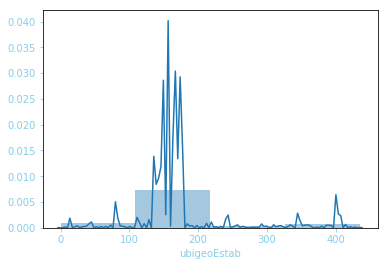

In [47]:
graf = sns.distplot(data['ubigeoEstab'], bins=4)
graf.xaxis.label.set_color('skyblue')
graf.tick_params(colors='skyblue')

ubigeoEstab   -0.012989
dtype: float64


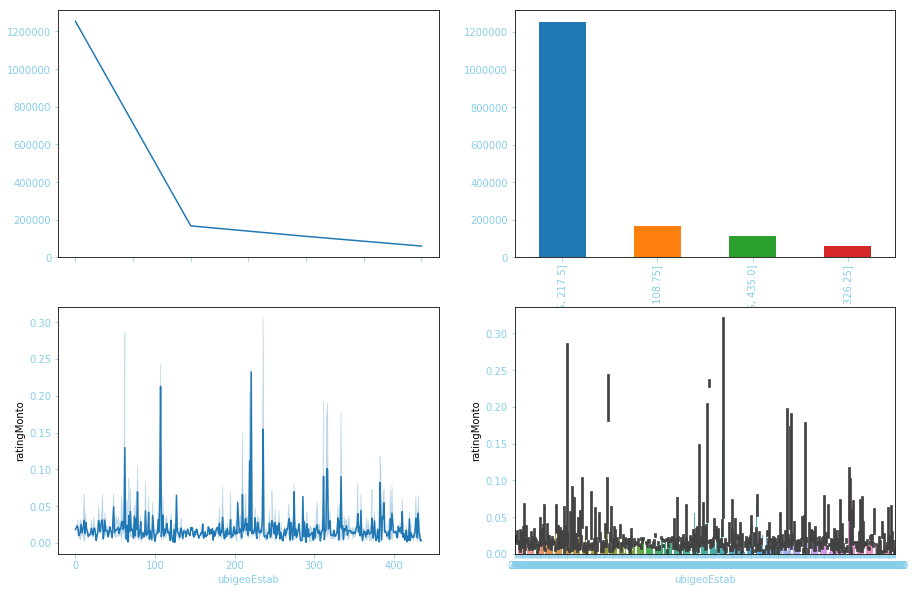

In [4]:
graphs_analysis(data, 'ubigeoEstab', 'ratingMonto', color_label='skyblue', bins=4, dropna=False)

In [27]:
data['ubigeoEstab'].value_counts(bins=4, dropna=False, normalize=True)

(108.75, 217.5]     0.787444
(-0.436, 108.75]    0.104939
(326.25, 435.0]     0.070011
(217.5, 326.25]     0.037606
Name: ubigeoEstab, dtype: float64

In [23]:
total = 1253310 + 167023 + 111430 + 59854
59854 / total, 111430 / total, 167023 / total, 1253310 / total

(0.037605780787714635,
 0.07001056158611023,
 0.10493919077265447,
 0.7874444668535207)

In [25]:
def cat_ubigeo(x):
    if x < 108:
        return 1
    elif x < 217:
        return 8
    elif x < 326:
        return 0.7
    else:
        return 0.3
data['catUbigeoEstab'] = data['ubigeoEstab'].apply(cat_ubigeo)

catUbigeoEstab   -0.053887
dtype: float64


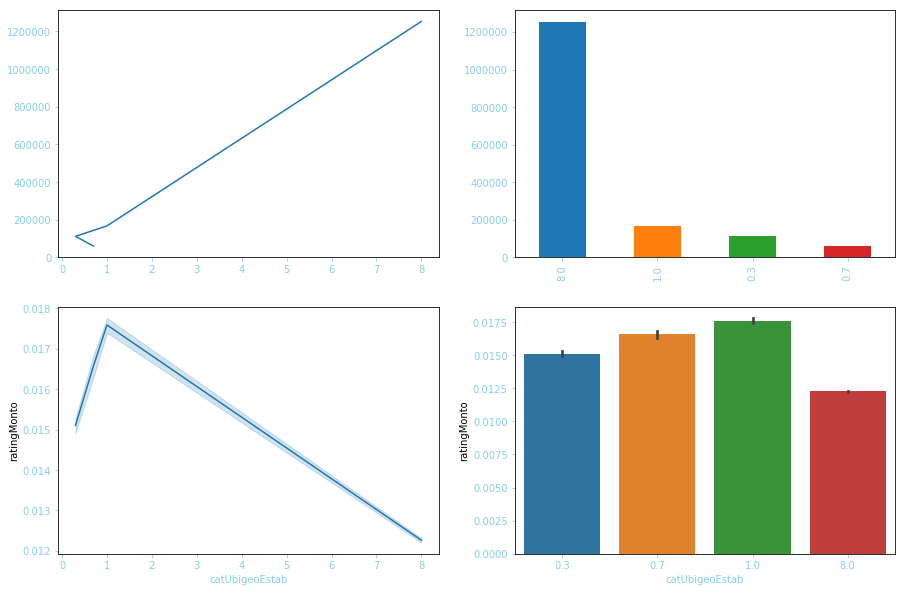

In [28]:
graphs_analysis(data, 'catUbigeoEstab', 'ratingMonto', color_label='skyblue', dropna=False)

## Analisis Codigo Giro

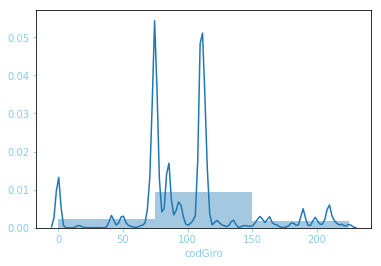

In [52]:
graf = sns.distplot(data['codGiro'], bins=3)
graf.xaxis.label.set_color('skyblue')
graf.tick_params(colors='skyblue')

codGiro    0.013554
dtype: float64


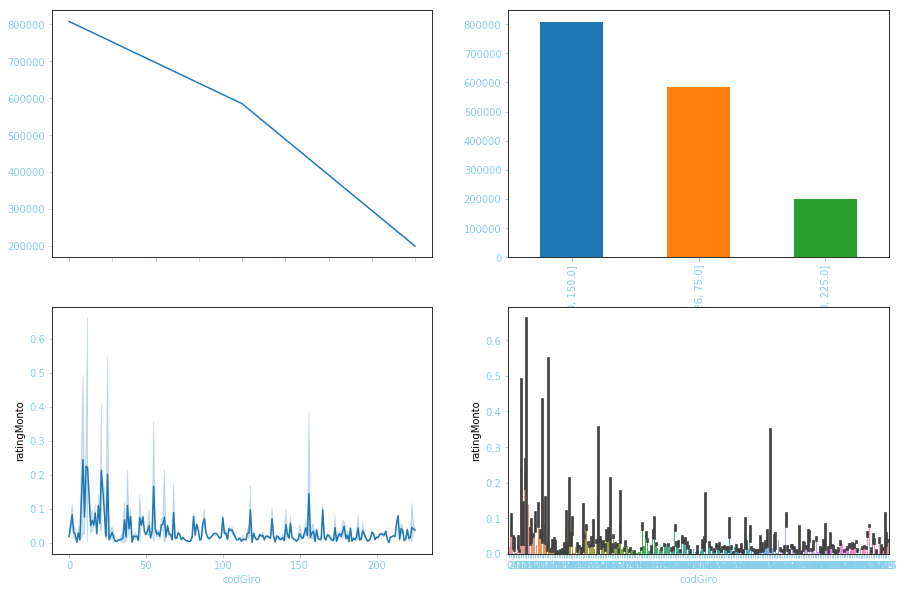

In [51]:
graphs_analysis(data, 'codGiro', 'ratingMonto', color_label='skyblue', bins=3, dropna=False)

In [54]:
data['codGiro'].value_counts(bins=3)

(75.0, 150.0]     807267
(-0.226, 75.0]    584707
(150.0, 225.0]    199643
Name: codGiro, dtype: int64

In [55]:
data['codGiro'].value_counts(bins=3, dropna=False, normalize=True)

(75.0, 150.0]     0.507199
(-0.226, 75.0]    0.367367
(150.0, 225.0]    0.125434
Name: codGiro, dtype: float64

In [56]:
def cat_giro(x):
    if x < 76:
        return 3.7
    elif x < 151:
        return 5
    else:
        return 1.3
data['catCodGiro'] = data['codGiro'].apply(cat_giro)

## ANALIZANDO FECHA

In [6]:
data['fechaOper'] = pd.to_datetime(data['fechaOper'])
data.dtypes

fechaOper            datetime64[ns]
codCliente                    int64
codGiro                     float64
codEstab                      int64
flagLimaProvEstab             int64
ubigeoEstab                 float64
ctdTrx                        int64
ratingMonto                 float64
dtype: object

In [7]:
data = data.sort_values(by=['fechaOper'])

In [8]:
data['fechaOper'] = data['fechaOper'].astype(str).apply(lambda x: x.split()[0])
data.head()

,fechaOper,codCliente,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,ctdTrx,ratingMonto
1339598,2016-11-01,4774,75.0,832,1,157.0,1,0.004901
938706,2016-11-01,26873,112.0,8527,1,147.0,1,0.008344
1165516,2016-11-01,10639,75.0,31051,1,402.0,1,0.017680
87078,2016-11-01,16656,110.0,60778,1,402.0,1,0.001724
938748,2016-11-01,1584,75.0,650,1,175.0,1,0.001590


In [9]:
add_col_dates(data, 'fechaOper', format_match="%Y-%m-%d", month_day=False)

,fechaOper,codCliente,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,ctdTrx,ratingMonto,date,month,day,year,weekday
1339598,2016-11-01,4774,75.0,832,1,157.0,1,0.004901,2016-11-01,11,1,2016,2
938706,2016-11-01,26873,112.0,8527,1,147.0,1,0.008344,2016-11-01,11,1,2016,2
1165516,2016-11-01,10639,75.0,31051,1,402.0,1,0.017680,2016-11-01,11,1,2016,2
87078,2016-11-01,16656,110.0,60778,1,402.0,1,0.001724,2016-11-01,11,1,2016,2
938748,2016-11-01,1584,75.0,650,1,175.0,1,0.001590,2016-11-01,11,1,2016,2
1513706,2016-11-01,13073,75.0,29527,1,149.0,1,0.000741,2016-11-01,11,1,2016,2
1165375,2016-11-01,6811,90.0,42598,1,401.0,1,0.002472,2016-11-01,11,1,2016,2
733145,2016-11-01,11937,143.0,1151,1,175.0,1,0.013626,2016-11-01,11,1,2016,2
938977,2016-11-01,17314,135.0,24544,1,157.0,1,0.001861,2016-11-01,11,1,2016,2
290065,2016-11-01,19842,75.0,4324,1,138.0,1,0.006316,2016-11-01,11,1,2016,2


In [10]:
del data['date']
del data['fechaOper']

In [57]:
data.head()

,codCliente,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,ctdTrx,ratingMonto,month,day,year,weekday,catUbigeoEstab,catCodGiro
1339598,4774,75,832,1,157,1,0.004901,11,1,2016,2,8.0,3.7
938706,26873,112,8527,1,147,1,0.008344,11,1,2016,2,8.0,5.0
1165516,10639,75,31051,1,402,1,0.017680,11,1,2016,2,0.3,3.7
87078,16656,110,60778,1,402,1,0.001724,11,1,2016,2,0.3,5.0
938748,1584,75,650,1,175,1,0.001590,11,1,2016,2,8.0,3.7


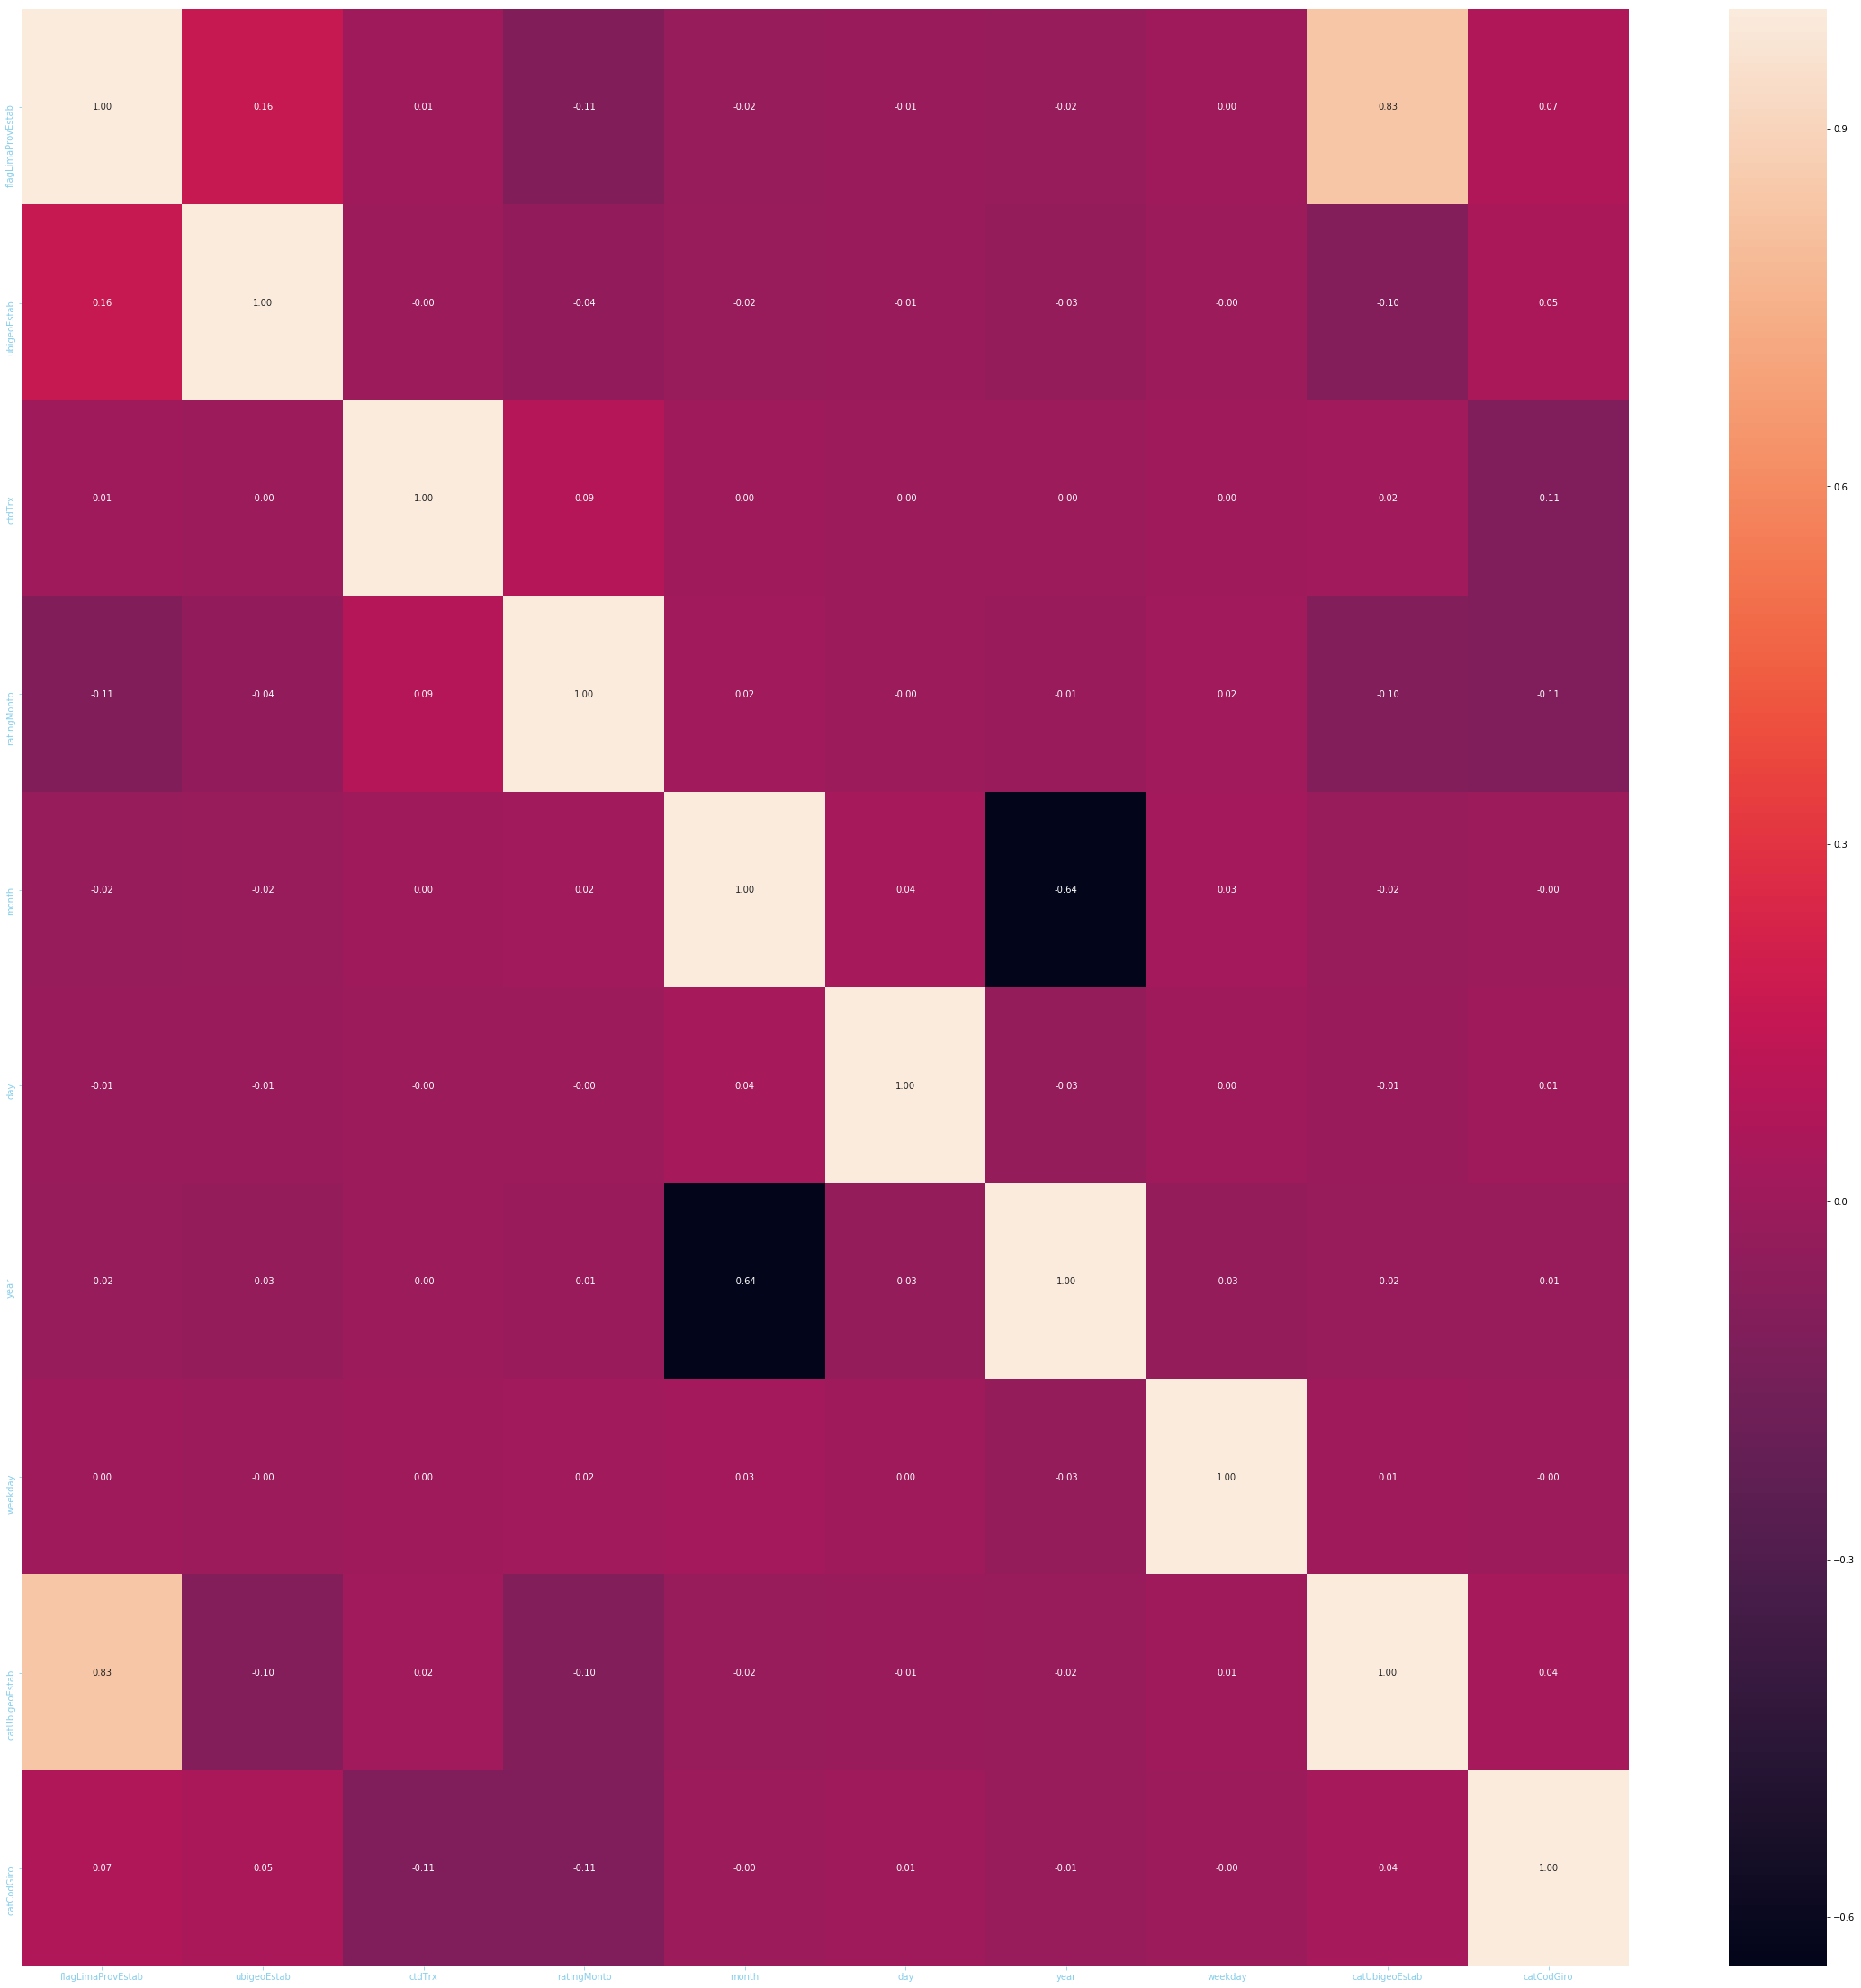

In [61]:
fig, ax = plt.subplots(figsize=(40, 40))
graf = sns.heatmap(data.iloc[:,3:].corr('spearman'), annot=True, fmt=".2f", ax=ax)
graf.xaxis.label.set_color('skyblue')
graf.yaxis.label.set_color('skyblue')
graf.tick_params(colors='skyblue')
graf.figure.savefig("img/corr_train.png")

In [62]:
data.columns

Index(['codCliente', 'codGiro', 'codEstab', 'flagLimaProvEstab', 'ubigeoEstab',
       'ctdTrx', 'ratingMonto', 'month', 'day', 'year', 'weekday',
       'catUbigeoEstab', 'catCodGiro'],
      dtype='object')

In [63]:
for col in ['month', 'day', 'flagLimaProvEstab', 'codGiro']:
    del data[col]

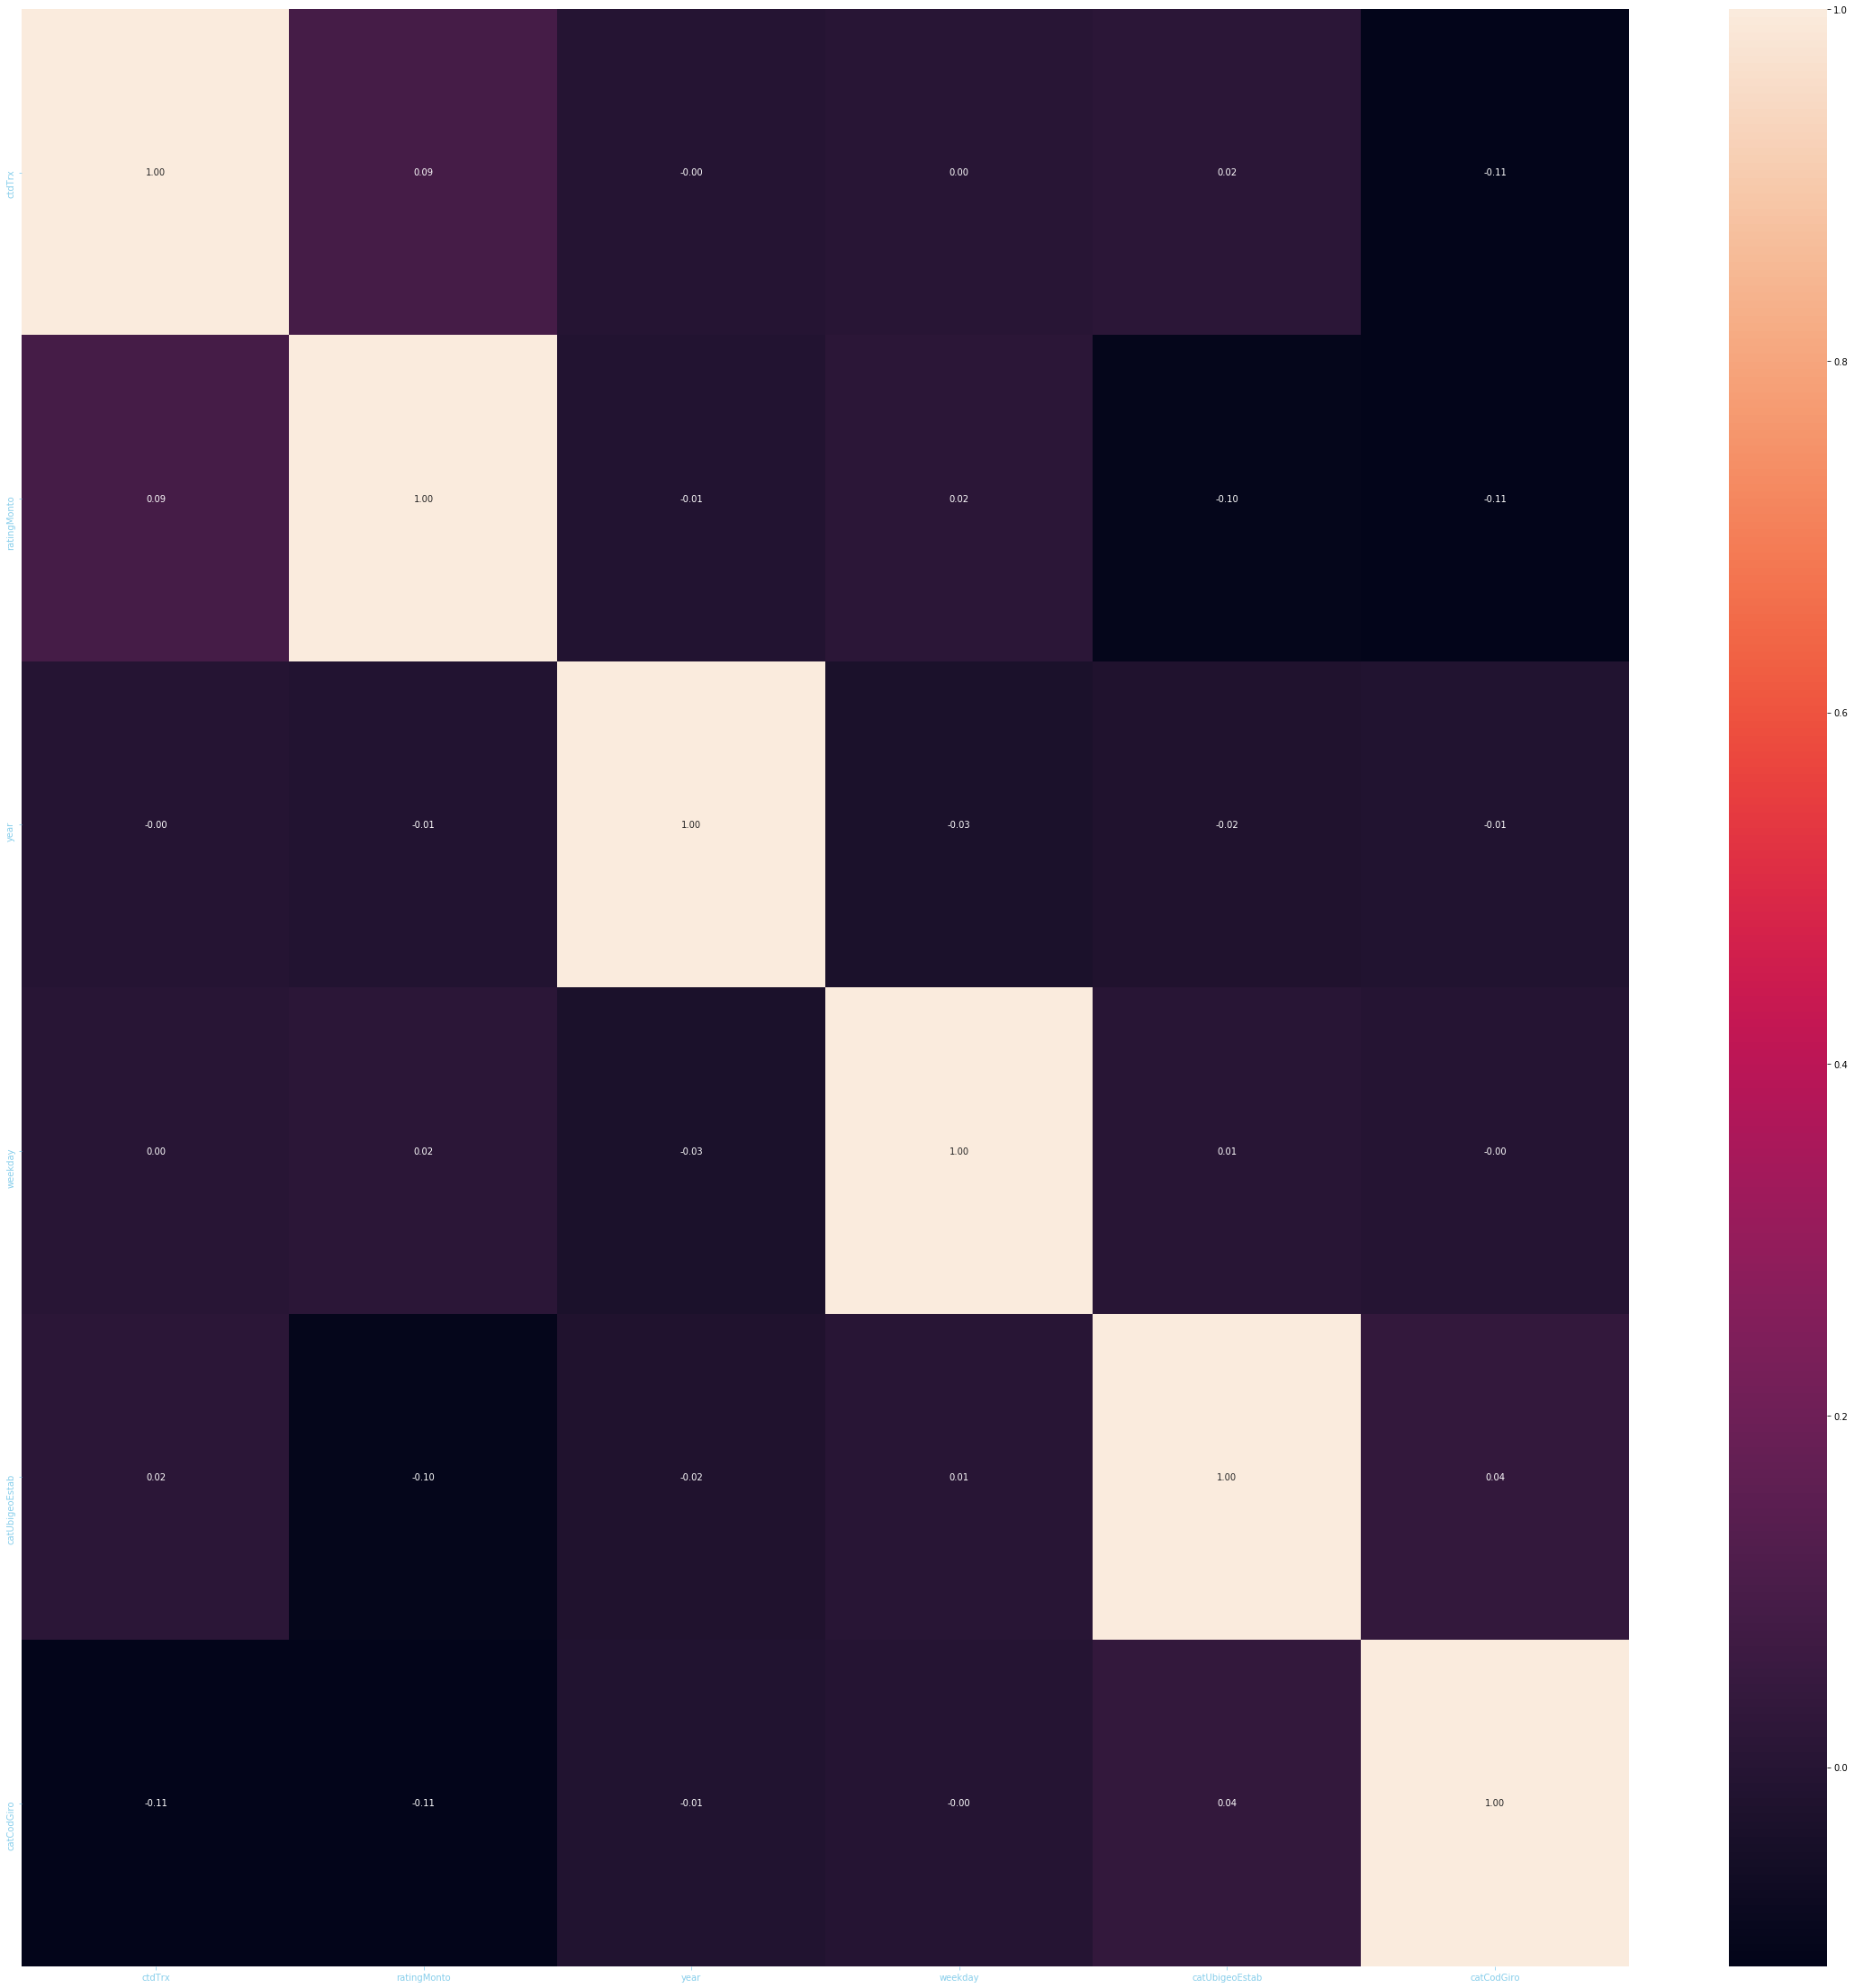

In [64]:
fig, ax = plt.subplots(figsize=(40, 40))
graf = sns.heatmap(data.iloc[:,3:].corr('spearman'), annot=True, fmt=".2f", ax=ax)
graf.xaxis.label.set_color('skyblue')
graf.yaxis.label.set_color('skyblue')
graf.tick_params(colors='skyblue')
graf.figure.savefig("img/corr_train_final.png")

In [65]:
data.columns

Index(['codCliente', 'codEstab', 'ubigeoEstab', 'ctdTrx', 'ratingMonto',
       'year', 'weekday', 'catUbigeoEstab', 'catCodGiro'],
      dtype='object')

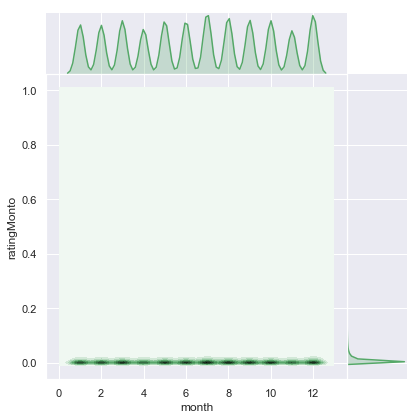

In [45]:
 sns.jointplot("month", "ratingMonto", data=data, kind="kde", space=0, color="g")

month    0.007585
dtype: float64


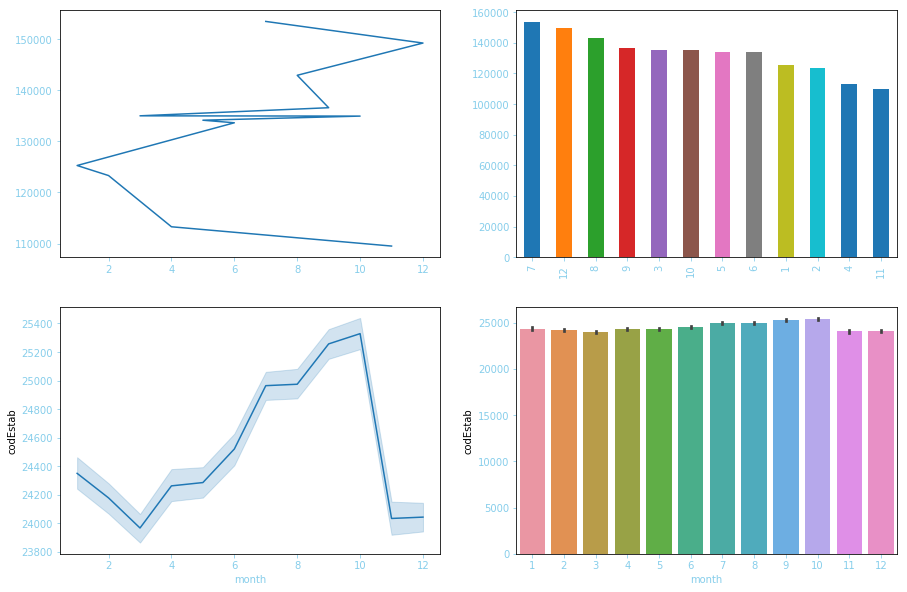

In [30]:
graphs_analysis(data, 'month', 'codEstab', color_label='skyblue', dropna=False)

weekday    0.021601
dtype: float64


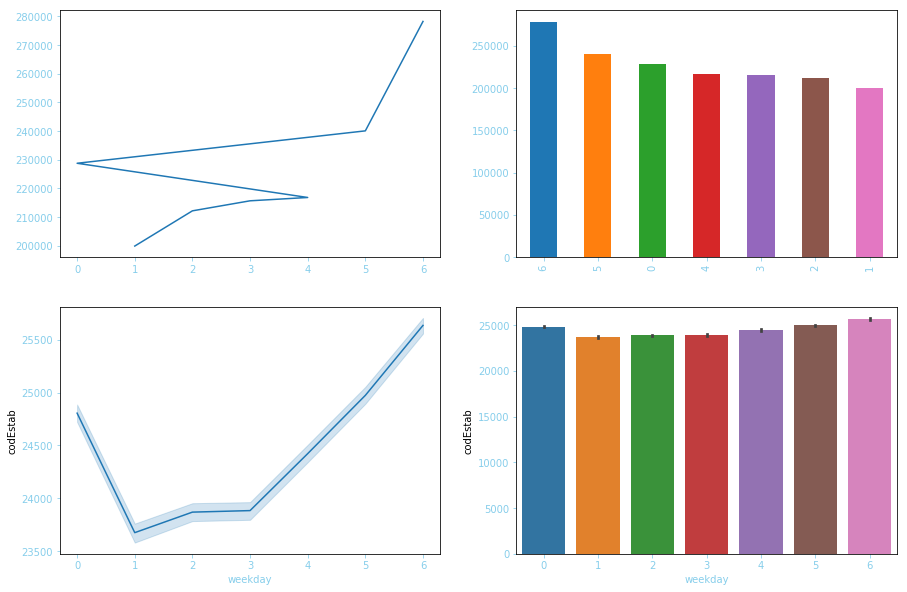

In [31]:
graphs_analysis(data, 'weekday','codEstab', color_label='skyblue', dropna=False)

weekday    0.006612
dtype: float64


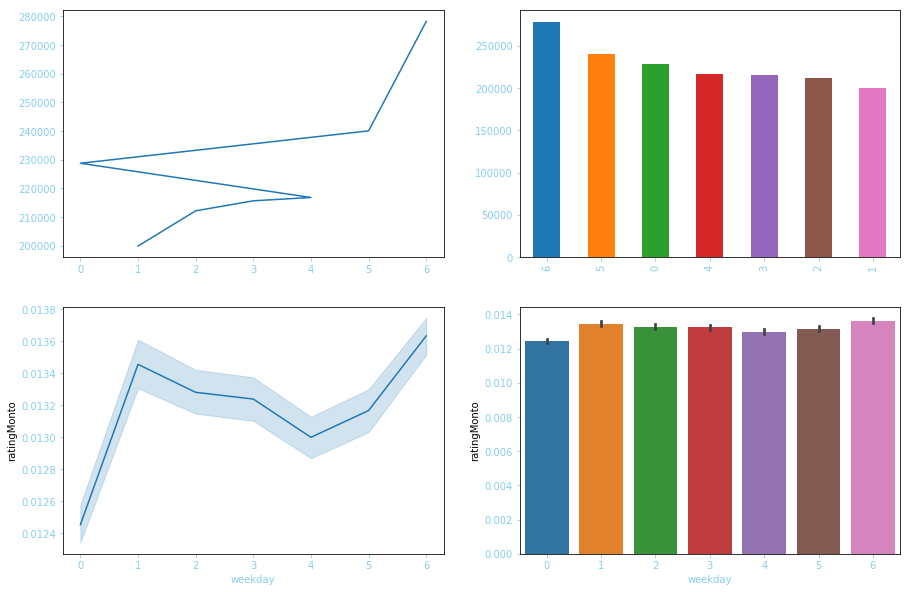

In [19]:
graphs_analysis(data, 'weekday', 'ratingMonto', color_label='skyblue', dropna=False)

In [33]:
#data['month'].value_counts(dropna=False)
data.groupby(by=['month'])['codEstab'].count()

month
1     125289
2     123319
3     135026
4     113284
5     134167
6     133662
7     153523
8     142969
9     136615
10    134971
11    109504
12    149288
Name: codEstab, dtype: int64

In [34]:
#data['weekday'].value_counts(dropna=False)
data.groupby(by=['weekday'])['codEstab'].count()

weekday
0    228765
1    199894
2    212174
3    215673
4    216831
5    240061
6    278219
Name: codEstab, dtype: int64

In [35]:
from utils import *
data_prueba = reduce_size_data(data, category=False, default='integer')
data_prueba.dtypes

Tamaño de uso actual :  197.8599624633789 MB
-> Int 64 Detected
     codCliente
     codEstab
     flagLimaProvEstab
     ctdTrx
     month
     day
     year
     weekday
-> Float 64 Detected
     codGiro
     ubigeoEstab
     ratingMonto
     catUbigeoEstab
Tamaño de uso final :  102.23325443267822 MB


codCliente             int16
codGiro                int16
codEstab               int32
flagLimaProvEstab       int8
ubigeoEstab            int16
ctdTrx                  int8
ratingMonto          float64
month                   int8
day                     int8
year                   int16
weekday                 int8
catUbigeoEstab       float64
dtype: object

In [36]:
data_prueba.dtypes

codCliente             int16
codGiro                int16
codEstab               int32
flagLimaProvEstab       int8
ubigeoEstab            int16
ctdTrx                  int8
ratingMonto          float64
month                   int8
day                     int8
year                   int16
weekday                 int8
catUbigeoEstab       float64
dtype: object

In [66]:
data_prueba.head(10)

,codCliente,codEstab,ubigeoEstab,ctdTrx,ratingMonto,year,weekday,catUbigeoEstab,catCodGiro
1339598,4774,832,157,1,0.004901,2016,2,8.0,3.7
938706,26873,8527,147,1,0.008344,2016,2,8.0,5.0
1165516,10639,31051,402,1,0.017680,2016,2,0.3,3.7
87078,16656,60778,402,1,0.001724,2016,2,0.3,5.0
938748,1584,650,175,1,0.001590,2016,2,8.0,3.7
1513706,13073,29527,149,1,0.000741,2016,2,8.0,3.7
1165375,6811,42598,401,1,0.002472,2016,2,0.3,5.0
733145,11937,1151,175,1,0.013626,2016,2,8.0,5.0
938977,17314,24544,157,1,0.001861,2016,2,8.0,5.0
290065,19842,4324,138,1,0.006316,2016,2,8.0,3.7


In [16]:
data.to_csv('data/train_clean_parse_date.csv')

In [67]:
for col in data.columns:
    print(col, data[col].unique().shape)

codCliente (30000,)
codEstab (74339,)
ubigeoEstab (422,)
ctdTrx (22,)
ratingMonto (723645,)
year (2,)
weekday (7,)
catUbigeoEstab (4,)
catCodGiro (3,)


In [68]:
del data['weekday']

In [69]:
data.columns

Index(['codCliente', 'codEstab', 'ubigeoEstab', 'ctdTrx', 'ratingMonto',
       'year', 'catUbigeoEstab', 'catCodGiro'],
      dtype='object')

In [74]:
data_estab = data.drop(['codCliente','ratingMonto', 'ctdTrx', 'year'], axis=1)
data_estab = data_estab.drop_duplicates()
data_estab.sort_values(by=['codEstab']).head().reset_index()

,index,codEstab,ubigeoEstab,catUbigeoEstab,catCodGiro
0,636060,1,0,1.0,3.7
1,626630,2,0,1.0,3.7
2,1528663,3,166,8.0,5.0
3,1391057,4,401,0.3,5.0
4,1250161,5,175,8.0,5.0


In [75]:
data_estab.shape

(74339, 4)

In [77]:
data_estab.dtypes

codEstab            int32
ubigeoEstab         int16
catUbigeoEstab    float64
catCodGiro        float64
dtype: object

In [177]:
data_estab.to_csv('data/clean_estab.csv')

In [92]:
data_train_2016 = data[
    ['codCliente', 'codEstab', 'ratingMonto']
][data['year'] == 2016].sort_values(by=['codCliente', 'codEstab']).reset_index()

data_train_2017 = data[
    ['codCliente', 'codEstab', 'ratingMonto']
][data['year'] == 2017].sort_values(by=['codCliente', 'codEstab']).reset_index()

In [93]:
data_train_2016.shape, data_train_2017.shape

((258792, 4), (1332825, 4))

In [94]:
data_train_2016.shape[0] + data_train_2017.shape[0]

1591617

In [98]:
del data_train_2016['index']
del data_train_2017['index']

In [99]:
data_train_2016.head()

,codCliente,codEstab,ratingMonto
0,1,1194,0.031735
1,1,2425,0.012931
2,1,4311,0.008188
3,1,40261,0.013214
4,2,37,0.016731


In [100]:
data_train_2017.head()

,codCliente,codEstab,ratingMonto
0,1,39,0.098481
1,1,39,0.018183
2,1,39,0.084590
3,1,39,0.018126
4,1,1911,0.119995


In [103]:
data_train_2017 = pd.DataFrame(
    data_train_2017.groupby(by=['codCliente', 'codEstab'])['ratingMonto'].sum()
)

In [104]:
data_train_2017.head()

ratingMonto
codCliente codEstab             
1          39           0.219380
           1911         0.119995
           2399         0.009543
           2425         0.011858
           3843         0.146084

In [108]:
data_train_2017.columns

Index(['ratingMonto'], dtype='object')

In [109]:
data_train_2017['fusion'] = data_train_2017.index

In [110]:
data_train_2017.head()

ratingMonto     fusion
codCliente codEstab                        
1          39           0.219380    (1, 39)
           1911         0.119995  (1, 1911)
           2399         0.009543  (1, 2399)
           2425         0.011858  (1, 2425)
           3843         0.146084  (1, 3843)

In [113]:
data_train_2017 = data_train_2017.reset_index()
data_train_2017['codCliente'] = data_train_2017['fusion'].apply(lambda x: x[0])
data_train_2017['codEstab'] = data_train_2017['fusion'].apply(lambda x: x[1])
del data_train_2017['fusion']
data_train_2017.head()

,codCliente,codEstab,ratingMonto
0,1,39,0.219380
1,1,1911,0.119995
2,1,2399,0.009543
3,1,2425,0.011858
4,1,3843,0.146084


In [115]:
data_train_2017.shape

(776997, 3)

In [116]:
data_train_2016 = pd.DataFrame(
    data_train_2016.groupby(by=['codCliente', 'codEstab'])['ratingMonto'].sum()
)
data_train_2016['fusion'] = data_train_2016.index
data_train_2016 = data_train_2016.reset_index()
data_train_2016['codCliente'] = data_train_2016['fusion'].apply(lambda x: x[0])
data_train_2016['codEstab'] = data_train_2016['fusion'].apply(lambda x: x[1])
del data_train_2016['fusion']
data_train_2016.head()

,codCliente,codEstab,ratingMonto
0,1,1194,0.031735
1,1,2425,0.012931
2,1,4311,0.008188
3,1,40261,0.013214
4,2,37,0.016731


In [117]:
data_train_2016.shape

(199990, 3)

In [162]:
data_train = pd.merge(
    data_train_2016, data_train_2017, on=['codCliente','codEstab'], how='outer'
).sort_values(
    by=['codCliente','codEstab']
).reset_index().drop(['index'], axis=1)
data_train.head()

,codCliente,codEstab,ratingMonto_x,ratingMonto_y
0,1,39,NaN,0.219380
1,1,1194,0.031735,NaN
2,1,1911,NaN,0.119995
3,1,2399,NaN,0.009543
4,1,2425,0.012931,0.011858


In [163]:
null_verificator(data_train)

,Nulos,Cantidad,Tipo Col
codCliente,False,0,int64
codEstab,False,0,int64
ratingMonto_x,True,701977,float64
ratingMonto_y,True,124970,float64


In [164]:
data_train.fillna(0, inplace=True)

In [165]:
null_verificator(data_train)

'DATA LIMPIA DE NULOS'

In [166]:
data_train['ratingMonto'] = (data_train['ratingMonto_x'] + data_train['ratingMonto_y']) / 2

In [167]:
data_train.head()


,codCliente,codEstab,ratingMonto_x,ratingMonto_y,ratingMonto
0,1,39,0.000000,0.219380,0.109690
1,1,1194,0.031735,0.000000,0.015868
2,1,1911,0.000000,0.119995,0.059998
3,1,2399,0.000000,0.009543,0.004772
4,1,2425,0.012931,0.011858,0.012395


In [172]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
minimo = data_train[data_train['ratingMonto_x'] > 0]['ratingMonto_x'].min()
maximo = data_train['ratingMonto_x'].max()

data_train['ratingMonto_z'] = data_train['ratingMonto_x'].apply(
    lambda x: (x - minimo / maximo - x) if x not in [
        minimo, maximo] and x > 0 else x
)

In [173]:
data_train.head(20)

,codCliente,codEstab,ratingMonto_x,ratingMonto_y,ratingMonto,ratingMonto_z
0,1,39,0.000000,0.219380,0.109690,0.000000
1,1,1194,0.031735,0.000000,0.015868,-0.000006
2,1,1911,0.000000,0.119995,0.059998,0.000000
3,1,2399,0.000000,0.009543,0.004772,0.000000
4,1,2425,0.012931,0.011858,0.012395,-0.000006
5,1,3843,0.000000,0.146084,0.073042,0.000000
6,1,4311,0.008188,0.000000,0.004094,-0.000006
7,1,4616,0.000000,0.036987,0.018493,0.000000
8,1,6314,0.000000,0.025185,0.012592,0.000000
9,1,18153,0.000000,0.008414,0.004207,0.000000


In [174]:
minimo, maximo

(6.015725105425582e-06, 0.9329689516435132)